In [1]:
import rasterio
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from dl_l8s2_uv import utils
from dl_l8s2_uv.satreaders import l8image, s2image

In [2]:
# Tweaks. Recommmended Tensorflow >=2.1 with a CUDA GPU (if available)
utils.select_cuda_device("gpu")

In [3]:
# Options: 
# FCNN input bands 
namemodels = ["rgbi", "rgbiswir"]
# Satellite image
satnames = ["L8", "S2"]

In [4]:
satname = "S2"
namemodel = "rgbiswir"

In [5]:
# Read image
if satname == "L8":
    # L-8 image
    landsatimage = "C:../../prods/LC08_L1TP_002053_20160520_20170324_01_T1"
    satobj = l8image.L8Image(landsatimage)

else:
    # S-2 image
    sentinelimage = "C:../../prods/S2A_MSIL1C_20160417T110652_N0201_R137_T29RPQ_20160417T111159.SAFE"
    satobj = s2image.S2Image(sentinelimage)

In [6]:
# LOAD MODEL
model = utils.Model(satname=satname, namemodel=namemodel)

In [7]:
# PREDICTION
# Compute cloud mask (CM) from image with selected model
cloud_prob_bin = model.predict(satobj)

In [8]:
# Store computed CM into .TIFF in product path
utils.save_cloud_mask(satobj, cloud_prob_bin, os.path.join(satobj.folder, "dluvclouds_" + namemodel + ".tif"))

In [9]:
# VISUALIZATIONS
RGB_BANDS = {"L8": [4, 3, 2], "S2": [3, 2, 1]}

# Load RGB bands for visualisation
rgb = satobj.load_bands(bands=RGB_BANDS[satname])

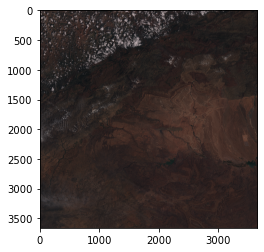

In [10]:
# Plot RGB
plt.imshow(rgb)

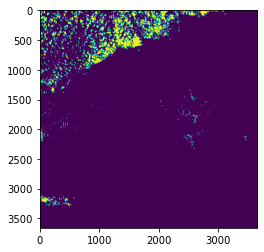

In [11]:
# Plot cloud mask
plt.imshow(cloud_prob_bin)